# Climate change: Teachers' perceptions and self-efficacy regarding its teaching in Primary School

![](pic_23001.jpg)

This research was carried out with the aim of studying the perceptions of primary school teachers in the region of Epirus, Greece on climate change. In addition, the level of self-efficacy of teachers in terms of teaching climate change was studied, as well as the relationship between the two above.

Thus, this research was designed in order to provide answers to the following research questions:
* What are the teachers' basic perceptions of climate change?
* To what extent do teachers consider it necessary to educate students about climate change?
* What do teachers see as the main challenges in teaching climate change?
* What is the level of self-efficacy of teachers in teaching climate change in school?
* Is there a correlation between teachers' core beliefs and self-efficacy for teaching climate change?
* To what extent can demographic factors such as age, years of service, general education and training in environmental issues influence the above perceptions and beliefs of teachers?

## Data collection tool

The [questionnaire](E23001_qre.md) consists of four parts. The first part includes questions about demographics. The second part consists of questions concerning perceptions and attitudes regarding the greenhouse effect and climate change. The third part concerns education on climate change and finally, the fourth part concerns teacher self-efficacy.

## Import data

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)

In [3]:
# Import dataset
raw_data=pd.read_csv('E23001_Data.csv')

## Data Validation

In [4]:
# A first look of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a001    132 non-null    object 
 1   a002    132 non-null    object 
 2   a0031   132 non-null    int64  
 3   a0032   132 non-null    int64  
 4   a0033   132 non-null    int64  
 5   a0034   132 non-null    int64  
 6   a0035   132 non-null    int64  
 7   a0036   132 non-null    int64  
 8   a0037   132 non-null    int64  
 9   a004    132 non-null    object 
 10  b00101  110 non-null    object 
 11  b00102  62 non-null     object 
 12  b00103  53 non-null     object 
 13  b00104  22 non-null     object 
 14  b00105  22 non-null     object 
 15  b00106  30 non-null     object 
 16  b00107  84 non-null     object 
 17  b00108  96 non-null     object 
 18  b00109  41 non-null     object 
 19  b00110  59 non-null     object 
 20  b00111  30 non-null     object 
 21  b00112  41 non-null     object 
 22  b0

#### Populate lists with likert scales and create a function to reorder the items of a list

In [5]:
# category order for likert scales
agreement_scale=['strongly disagree','disagree','neither agree nor disagree','agree','strongly agree']
concern_scale=['very unconcerned','unconcerned','neutral','concerned','very concerned']
importance_scale=['very unimportant','unimportant','neutral','important','very important']
# function to reorder categories
def my_cat_order(data,column,myorder):
    cats=data[column].unique()
    mycats = [cats[i] for i in myorder]
    return(mycats)

#### Missing values

In [6]:
print('There are',raw_data.isnull().sum().sum(),'missing values in the data set')

There are 2770 missing values in the data set


In [7]:
raw_data.loc[:,'b00101':'b00115']=raw_data.loc[:,'b00101':'b00115'].fillna('not selected')

In [8]:
raw_data.loc[:,'b0061':'b0085']=raw_data.loc[:,'b0061':'b0085'].fillna(0)

In [9]:
print('There are',raw_data.isnull().sum().sum(),'missing values in the data set')

There are 0 missing values in the data set


#### Aggregate data for the 'a003: Education' variable

In [10]:
a003_cats=['two-year primary \n education academy',
                      'two-year primary \n education academy \n with simulation',
                      'department of \n primary education',
                      'other university \n degree',
                      'second degree',
                      "master's degree",
                      'PhD']
a003_counts=[raw_data['a003'+str(i)].sum() for i in range(1,8)]
a003={'education':a003_cats,'count':a003_counts}
a003=pd.DataFrame(data=a003).sort_values(by='count',ascending=False)

#### Aggregate data for the 'b001' variable

In [11]:
b001={'country':[],'planet':[],'both':[]}
for i in range(15):
    cntr=0
    if 'country' in raw_data.value_counts(['b001'+f'{i+1:02}']).index:
        cntr=raw_data.value_counts(['b001'+f'{i+1:02}'])['country']
    b001['country'].append(cntr)
    plnt=0
    if 'planet' in raw_data.value_counts(['b001'+f'{i+1:02}']).index:
        plnt=raw_data.value_counts(['b001'+f'{i+1:02}'])['planet']
    b001['planet'].append(plnt)
    both=0
    if 'both' in raw_data.value_counts(['b001'+f'{i+1:02}']).index:
        both=raw_data.value_counts(['b001'+f'{i+1:02}'])['both']
    b001['both'].append(both)
b001=pd.DataFrame(b001)
b001['country']=b001['country']+b001['both']
b001['planet']=b001['planet']+b001['both']
b001=b001[['country','planet']]
b001.index=['Poverty','Hunger','Access to health services','Access to education',
            'Gender discrimination','Access to clean water','Energy issue',
            'Unemployment','Lack of basic infrastructure','Inequalities',
            'Unsustainable cities and communities','Excessive consumption and production',
            'Climate crisis','Loss of biodiversity','Wars']

#### Aggregate data for the 'b006' variable

In [12]:
causes=['Exhaust gas','Waste','Population growth','Deforestation','Overconsumption','Other']
cause_count=[raw_data['b006'+str(i)].sum().astype('int64') for i in range(1,7)]
b006={'cause':causes,'count':cause_count}
b006=pd.DataFrame(data=b006).sort_values(by='count',ascending=False)

#### Aggregate data for the 'b007' variable

In [13]:
effects=['Global Warming', 'Extreme Weather', 'Species Extinction', 'Rising Water Levels', 'Other']
effects_count=[raw_data['b007'+str(i)].sum().astype('int64') for i in range(1,6)]
b007={'effect':effects,'count':effects_count}
b007=pd.DataFrame(data=b007).sort_values(by='count',ascending=False)

#### Aggregate data for the 'b008' variable

In [14]:
ways_to_deal=['Information / Education','Renewable energy sources','Reduction of greenhouse \n gas emissions','Forest protection','Other']
ways_to_deal_count=[raw_data['b008'+str(i)].sum().astype('int64') for i in range(1,6)]
b008={'deal':ways_to_deal,'count':ways_to_deal_count}
b008=pd.DataFrame(data=b008).sort_values(by='count',ascending=False)

In [15]:
def my_catplot(type,data,x=None,y=None,title=None,xlabel=None,ylabel=None,order=None,ax=None,stat=None):
    if type=='count_x':
        g=sns.countplot(data,x=x,order=order,ax=ax,stat=stat)
        g.bar_label(g.containers[-1], fmt='%.0f', label_type='center')
    elif type=='count_y':
        g=sns.countplot(data,y=y,order=order,ax=ax,stat=stat)
        g.bar_label(g.containers[-1], fmt='%.0f', label_type='center')
    elif type=='bar':
        g=sns.barplot(data,x=x,y=y,order=order,ax=ax)
        g.bar_label(g.containers[-1], fmt='%.0f', label_type='center')
    g.set(title=title,xlabel=xlabel, ylabel=ylabel)
    return(g)

## Sample

A total of 132 people participated in the research, of which 86 are graduates of the department of primary education, 20 are graduates of a two-year primary education academy, 13 are graduates of a two-year primary education academy with simulation and 12 have another university degree. Also, 4 have a second degree, 48 have a master's degree and 6 have a PhD. In addition, 22 people are trained in environmental issues.

In [16]:
# f, (ax1, ax2) = plt.subplots(ncols=2)
# sns.barplot(data=a003,x='count',y='education', ax=ax1)
# sns.barplot(data=a003,x='count',y='education', ax=ax2)

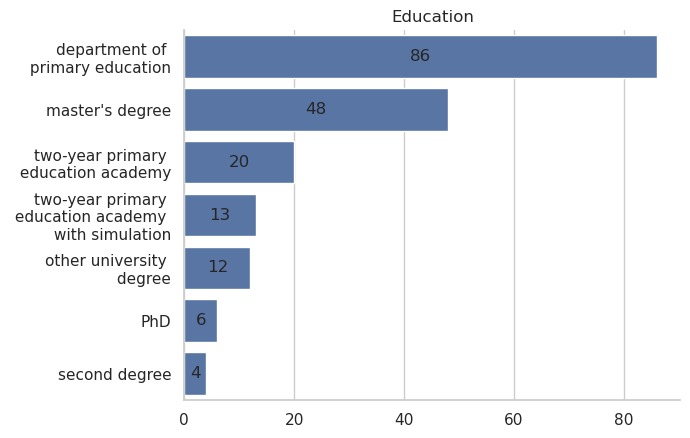

In [17]:
fig=my_catplot('bar',a003,x='count',y='education',title='Education',stat='percent')
plt.show()

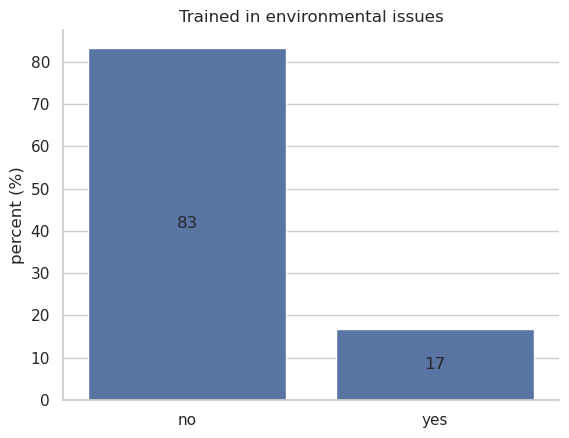

In [18]:
fig=my_catplot('count_x',
               raw_data,
               x='a004',
               title='Trained in environmental issues',
               stat='percent',
               ylabel='percent (%)')
plt.show()

The age range is from 21 to 60 and they are classified into age groups as follows. 41 people are from 21 to 30 years old, 41 people are from 31 to 40 years old, 24 people are from 41 to 50 years old and 26 people are from 51 to 60 years old.

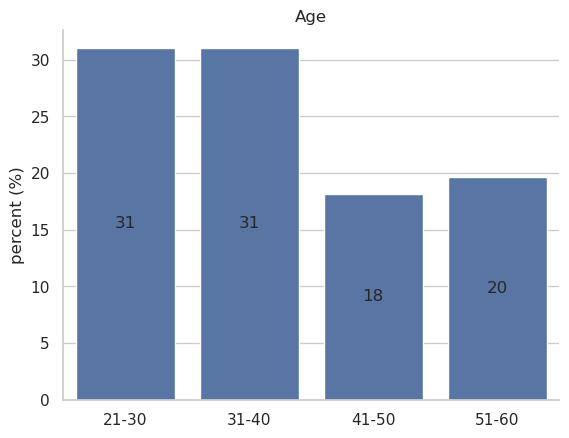

In [19]:
category_order = my_cat_order(raw_data,'a001',[0,1,2,3])
fig=my_catplot('count_x',raw_data,x='a001',title='Age',order=category_order,stat='percent',
               ylabel='percent (%)')
plt.show()

Regarding work experience in education, 70 people have experience up to 10 years, 26 people from 11 to 20 years, 23 people from 21 to 30 years and 13 people have work experience in education over 31 years.

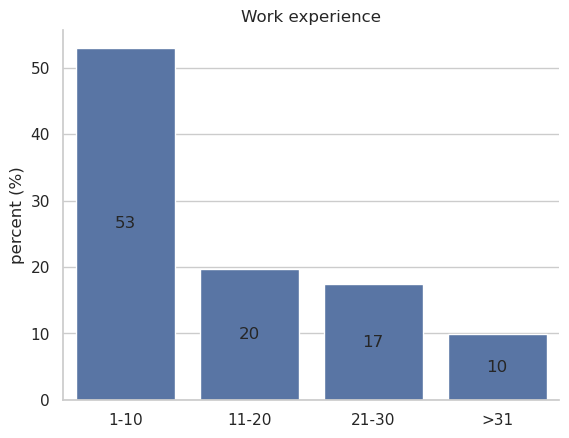

In [20]:
category_order = my_cat_order(raw_data,'a002',[0,1,3,2])
fig=my_catplot('count_x',raw_data,x='a002',title='Work experience',order=category_order,stat='percent',
               ylabel='percent (%)')
plt.show()

## Data analysis

A basic tool of the present analysis are the diagrams produced from frequency tables and other descriptive data.

In addition to the variables created directly from the questionnaire questions, an indicator variable was also used. This indicator was created based on the formula $ \dfrac{5}{2}\left(\sum_{i=1}^{10}{\Delta_i-10}\right) $, where $ \Delta_i,~i=1,2\ldots,10 $ are the answers to the questions of part D of the questionnaire. This indicator measures the teacher's self-efficacy on a scale from 0 to 100. The self-efficacy indicator was tested for reliability and found to be a reliable tool (Cronbach's Alpha=0.972).

In [21]:
likert = ['strongly disagree','disagree','neither agree nor disagree','agree','strongly agree']
delta = [1,2,3,4,5]
# recode likert scale to numerical equivelant
df=raw_data
df.loc[:,'d001':'d010']=df.loc[:,'d001':'d010'].replace(likert,delta)
# generate the list of the 10 column names of pard D
d=[]
for i in range(10):
    d.append('d'+f'{i+1:03}')
# change type to numeric (ineger)
df[d]=df[d].astype('int64')
# summarise the values of columns d001 to d010
df['sum_d'] = df[d].sum(axis=1)
# create self-efficasy indicator
df['self_efficasy'] = df['sum_d'].transform(lambda x: 5/2*(x-10))

In [22]:
import pingouin as pg
# calculate Cronbach's Alpha
ca=pg.cronbach_alpha(data=df[d])
print("Cronbach's Alpha:",round(ca[0],3))

Cronbach's Alpha: 0.972


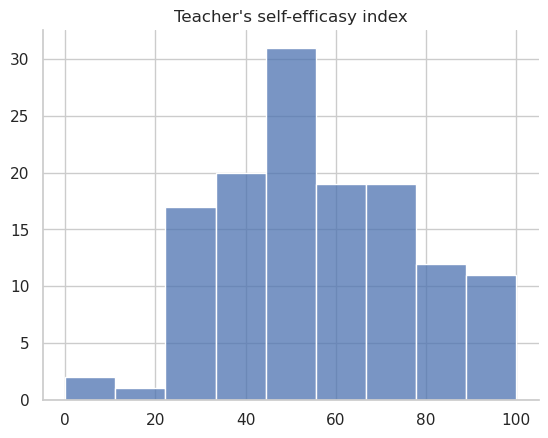

In [23]:
fig=sns.histplot(df,x='self_efficasy')
fig.set(title="Teacher's self-efficasy index",xlabel=None, ylabel=None)
plt.show()

Demographic variables are considered independent. More specifically, age, years of service, education and training in environmental issues.
All the variables used are distinct except for the self-efficacy index which, after a normality test (Kolmogorov – Smirnov), was found not to follow a normal distribution (p=0.000<0.05). So all the tests related to this indicator are non-parametric.
To test the correlation between the self-efficacy index and the independent variables, the Mann-Whitney U Test (independent variables with two categories) and the Kruskal Wallis Test (independent variables with more than two categories) were used.
The Chi Square Test was used to test the correlation between the discrete (categorical) dependent variables and the independent variables.
All tests were performed at a 5% significance level (a=0.05).

In [24]:
from scipy.stats import kstest
ks=kstest(df['self_efficasy'], 'norm')
print('Kolmogorov – Smirnov test statistic is',round(ks[0],3),'and the corresponding p-value is',round(ks[1],3))

Kolmogorov – Smirnov test statistic is 0.992 and the corresponding p-value is 0.0


## Results

### Basic perceptions

The biggest problems facing the country are unemployment and poverty, according to the respondents' answers. Climate change ranks 8th with only 3.9% of respondents considering it an important problem for the country. Instead, climate change is the planet's next most important problem, as shown in the diagram.
Obviously, the participants in the research are influenced by the socio-political situation in Europe at this time, however they seem to see the problem of climate change as a problem of the planet and not so much of the country in which they live.

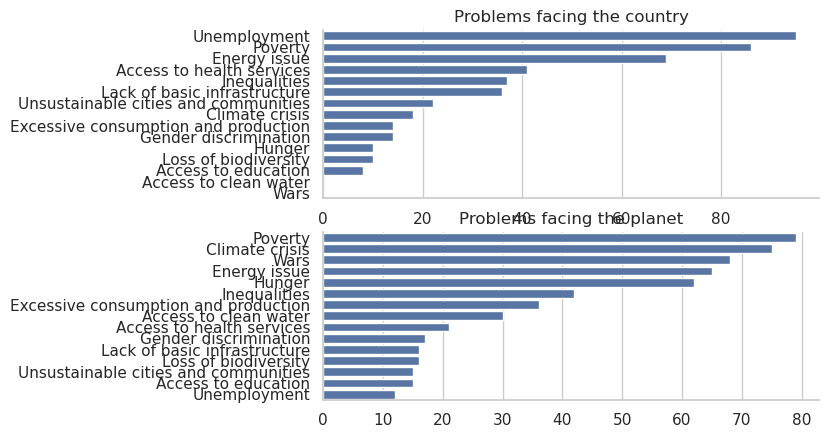

In [25]:
f, (ax1, ax2) = plt.subplots(nrows=2)
b001=b001.sort_values('country',ascending=False)
fig1=sns.barplot(data=b001,x='country',y=b001.index,ax=ax1)
fig1.set(title='Problems facing the country',xlabel=None, ylabel=None)
b001=b001.sort_values('planet',ascending=False)
fig2=sns.barplot(data=b001,x='planet',y=b001.index,ax=ax2)
fig2.set(title='Problems facing the planet',xlabel=None, ylabel=None)
plt.show()

In [26]:
# b001=b001.sort_values('country',ascending=False)
# my_bar_plot(b001,'country',b001.index,'Problems facing the country')

The vast majority consider that climate change is a problem of the time with almost 88% considering it quite to very serious.

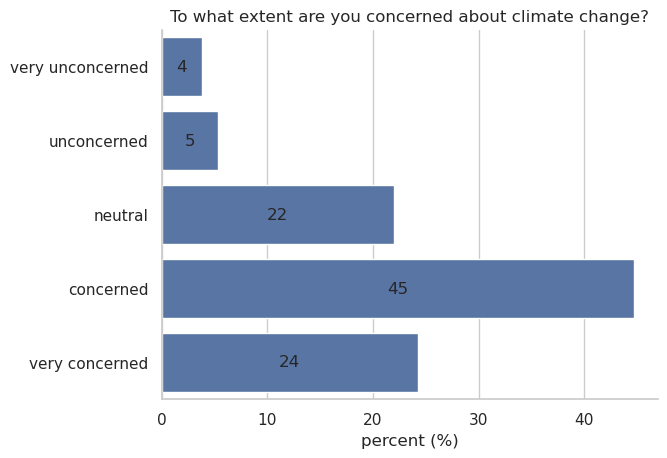

In [27]:
category_order = concern_scale
fig=my_catplot('count_y',
               data=df,
               y='b002',
               title='To what extent are you concerned about climate change?',
               order=category_order,
               stat='percent',
               xlabel='percent (%)')
plt.show()

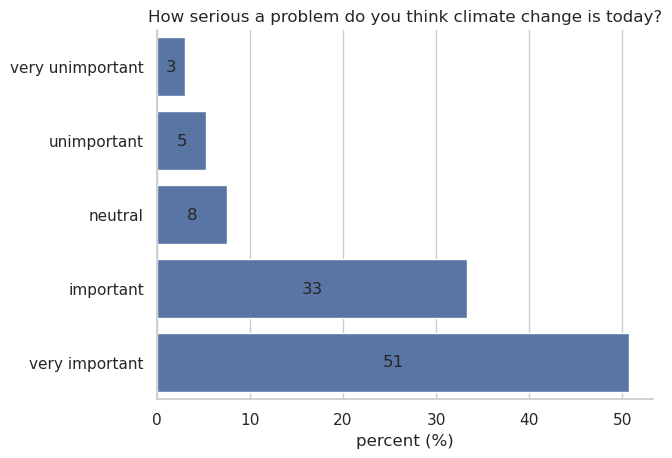

In [28]:
category_order = importance_scale
fig=my_catplot('count_y',
               data=df,
               y='b005',
               title='How serious a problem do you think climate change is today?',
               order=category_order,
               stat='percent',
               xlabel='percent (%)')
plt.show()

The main cause of climate change is exhaust gas and greenhouse gases in general, with 58.7% of the sample supporting this view. Next, by a large margin, are the destruction of forests and overconsumption.

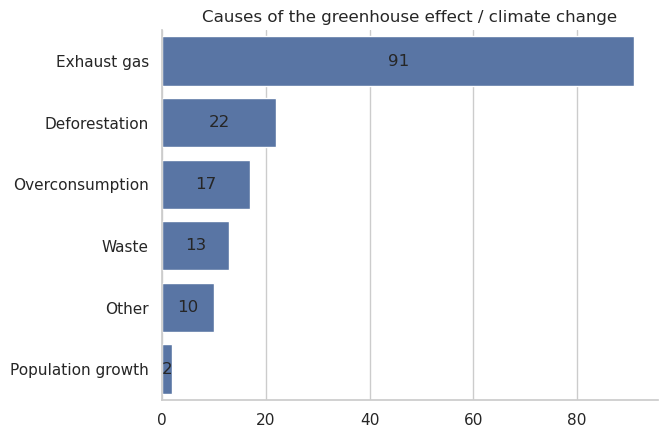

In [29]:
fig=my_catplot('bar',
               data=b006,
               y='cause',
               x='count',
               title='Causes of the greenhouse effect / climate change')
plt.show()

The effects of climate change, according to the participants' answers, are mainly global warming and rising water levels. If we consider that global warming implies an increase in water levels, then we can conclude that almost 80% believe that the main consequence of the climate crisis is the increase in global temperature.

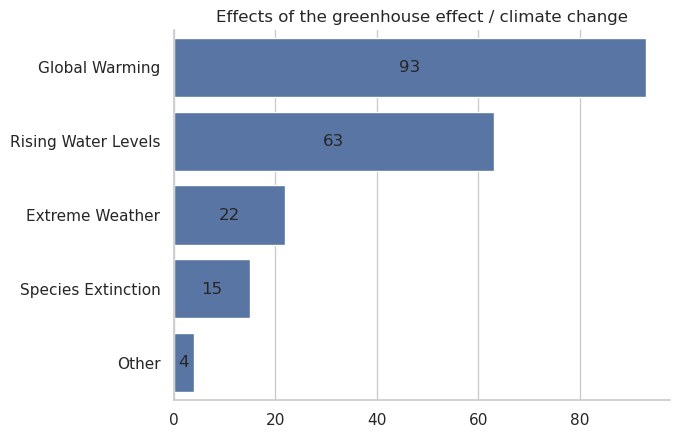

In [30]:
fig=my_catplot('bar',
               data=b007,
               y='effect',
               x='count',
               title='Effects of the greenhouse effect / climate change')
plt.show()

Regarding the ways to deal with climate change, the respondents answered that the main solutions are renewable energy sources (38.2%) and the reduction of greenhouse gas emissions (30.6%). It is impressive that given that the vast majority of participants are
educators, few consider education as a way to deal with the climate crisis (17.8%).

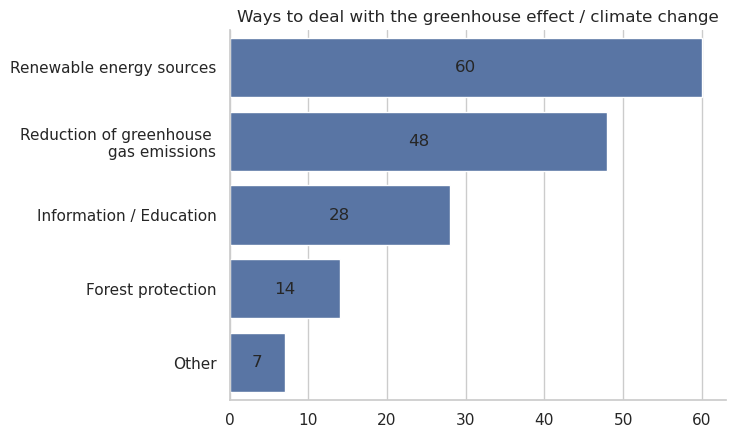

In [31]:
fig=my_catplot('bar',
               data=b008,
               y='deal',
               x='count',
               title='Ways to deal with the greenhouse effect / climate change')
plt.show()

Almost all (94%) believe that there is climate change and the majority of them (71.77%) believe that it is due to human action.

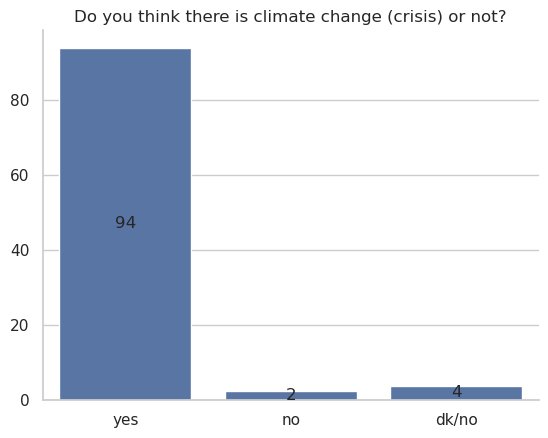

In [32]:
category_order = my_cat_order(df,'b003',[0,2,1])
fig=my_catplot('count_x',
               data=df,
               x='b003',
               title='Do you think there is climate change (crisis) or not?',
               order=category_order,
               stat='percent')
plt.show()

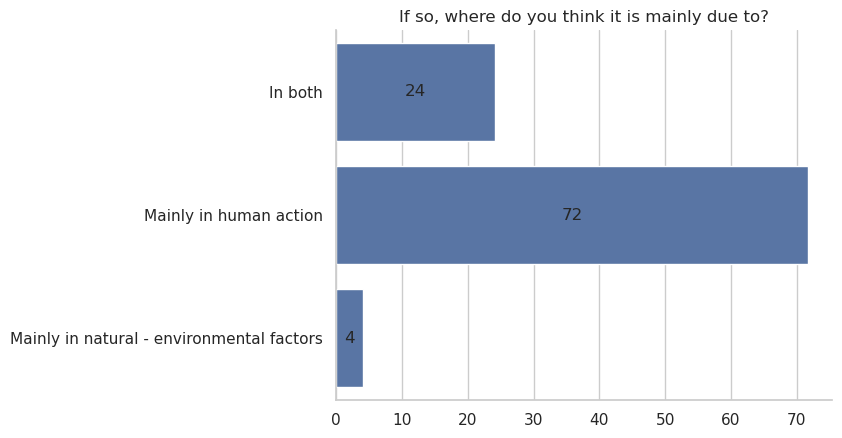

In [33]:
fig=my_catplot('count_y',
               data=df[df['b003']=='yes'],
               y='b004',
               title='If so, where do you think it is mainly due to?',
               stat='percent')
plt.show()

### Teaching climate change

From the answers to the question whether the school sufficiently integrates climate change into the curriculum, we conclude that the participants have a rather negative opinion. More specifically, 84% consider that the teaching of climate change is little or moderately integrated into the curriculum. Correspondingly, most believe (90%) that students should be taught more about climate change.

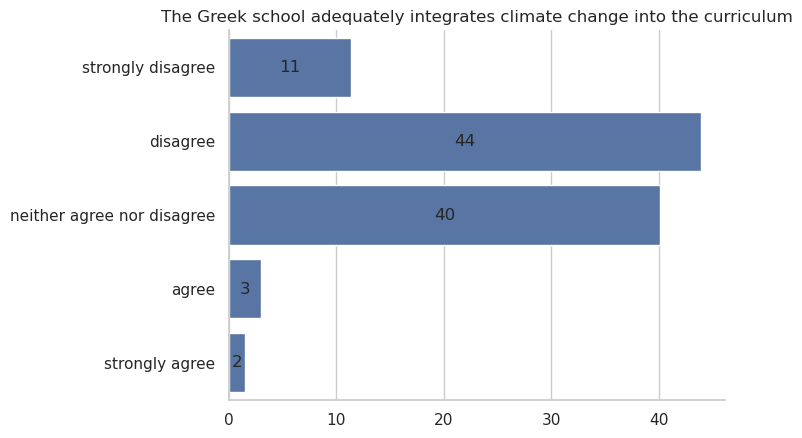

In [34]:
category_order = agreement_scale
fig=my_catplot('count_y',
               data=df,
               y='c001',
               title='The Greek school adequately integrates climate change into the curriculum',
               stat='percent',
               order=category_order)
plt.show()

It is almost unanimously agreed that students should possess the necessary knowledge and understanding of climate change, the motivation to respond positively to the challenges of climate change, and the ability to communicate satisfactorily with others about the challenges of climate change.

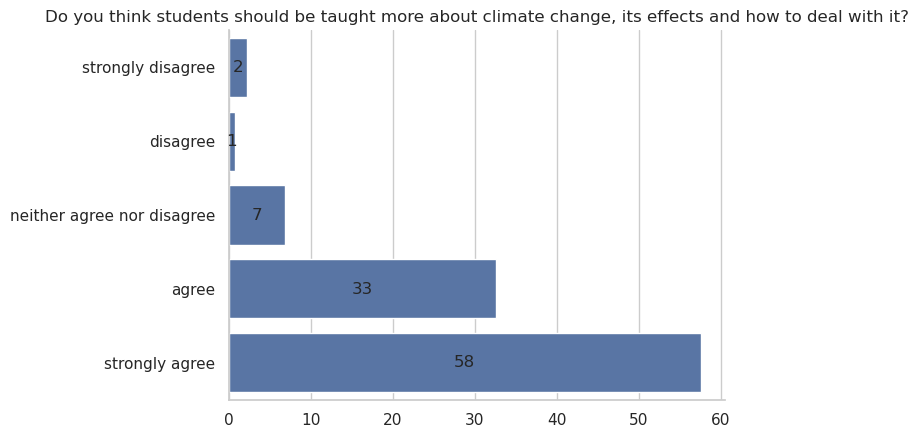

In [35]:
category_order = agreement_scale
fig=my_catplot('count_y',
               data=df,
               y='c003',
               title='Do you think students should be taught more about climate change, its effects and how to deal with it?',
               stat='percent',
               order=category_order)
plt.show()

Another important conclusion of the analysis of the answers is that while the teachers consider it very important for the students of the Greek schools to acquire knowledge of climate change, they themselves have not received the necessary training. More specifically, in the next diagram, it appears that the vast majority (88.64%) have not received the necessary training to be able to effectively teach climate change.

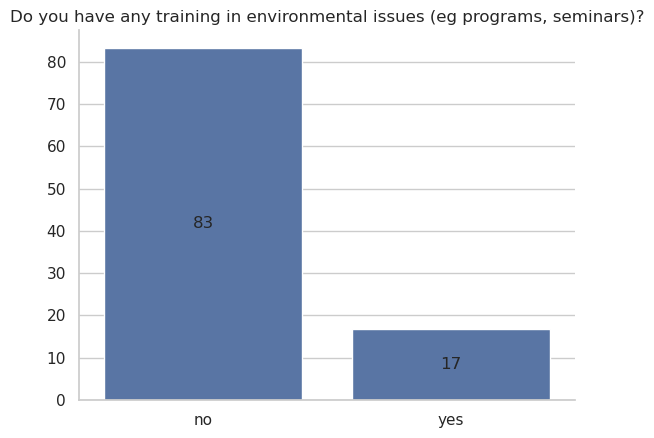

In [36]:
fig=my_catplot('count_x',
               data=df,
               x='a004',
               title='Do you have any training in environmental issues (eg programs, seminars)?',
               stat='percent')
plt.show()

Almost a third of teachers do not have a clear view on whether there are challenges in teaching climate change. Of the 58% who consider that there are challenges, they consider that the most important are the limited teaching time and the difficulty for the student to understand the concept of climate change.

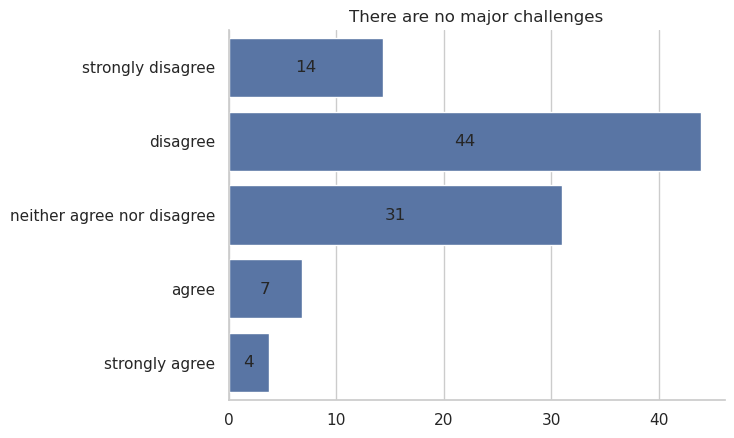

In [37]:
category_order = agreement_scale
fig=my_catplot('count_y',
               data=df,
               y='c0057',
               title='There are no major challenges',
               stat='percent',
               order=category_order)
plt.show()

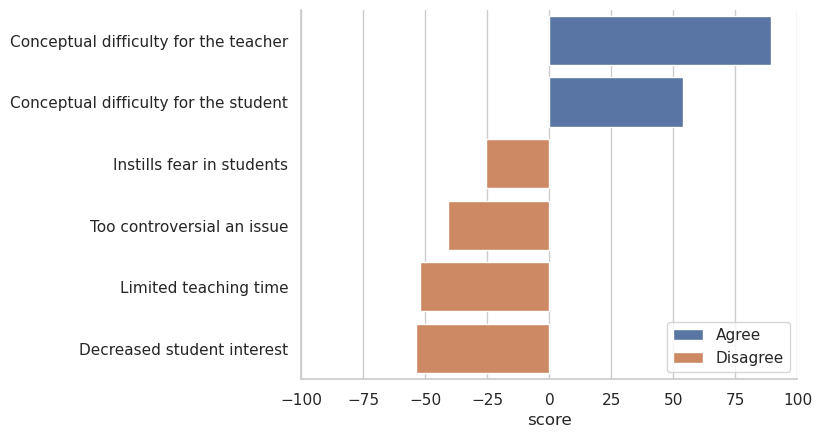

In [38]:
c005=df.loc[:,'c0051':'c0056'].replace(agreement_scale, [-2,-1,0,1,2]).sum().apply(lambda x: round(x/len(df)*100,2))
c005=pd.DataFrame({'score':c005}).sort_values('score',ascending=False)
c005.index=['Conceptual difficulty for the teacher',
            'Conceptual difficulty for the student',
            'Instills fear in students',
            'Too controversial an issue',
            'Limited teaching time',
            'Decreased student interest']
colors = ['Agree' if c >= 0 else 'Disagree' for c in c005['score']]
fig=sns.barplot(c005,x='score',y=c005.index,hue=colors)
fig.set(xlim=(-100, 100),ylabel=None)
fig.legend(loc=4)
plt.show()

### Teacher self-efficacy

As mentioned above, the self-efficacy index created from the answers to the questions of part D of the questionnaire. The values of the index range from 0 to 100 expressing an interval from the lowest to the highest self-efficacy.
The average self-efficacy index has a value of 56.78 points. However, the correlation it shows with receiving adequate training in teaching climate change is interesting. The average self-efficacy index is statistically significantly higher (p=0.012) among teachers who have received adequate training for teaching climate change as shown in the following diagrams.

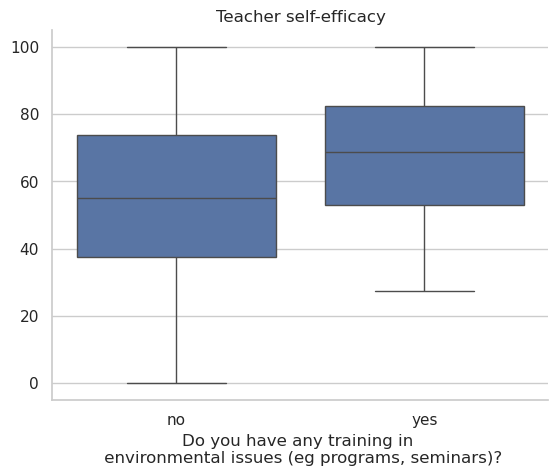

In [88]:
fig=sns.boxplot(df,y='self_efficasy',x='a004')
fig.set(title='Teacher self-efficacy',xlabel='Do you have any training in \n environmental issues (eg programs, seminars)?',ylabel=None)
plt.show()

In [86]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(df[df['a004']=='no']['self_efficasy'],
                     df[df['a004']=='yes']['self_efficasy'], method="exact")
if p<0.05:
    mw='is'+' (p='+str(round(p,3))+')'
else:
    mw='is not'+' (p='+str(round(p,3))+')'
print('The average self-efficacy index',mw,'statistically significantly higher among teachers who have received adequate training for teaching climate change')

The average self-efficacy index is (p=0.012) statistically significantly higher among teachers who have received adequate training for teaching climate change


### Relationship of self-efficacy and teachers' core beliefs about climate change

To study the correlation between self-efficacy and teachers' basic perceptions of climate change, 94% of respondents who believe that the problem of climate change exists were used as a sample.
Regarding how much everyone is concerned about the climate crisis, a significant relationship (p=0.002) with self-efficacy was observed. In particular, a statistically significant increase in the average self-efficacy index is observed, as the degree to which one is concerned about climate change increases.
Corresponding are the results regarding the opinion of the respondents on the seriousness of the problem of climate change.
Here too, a statistically significant increase (p=0.000) of the average self-efficacy index was observed alongside the severity of the climate change problem.

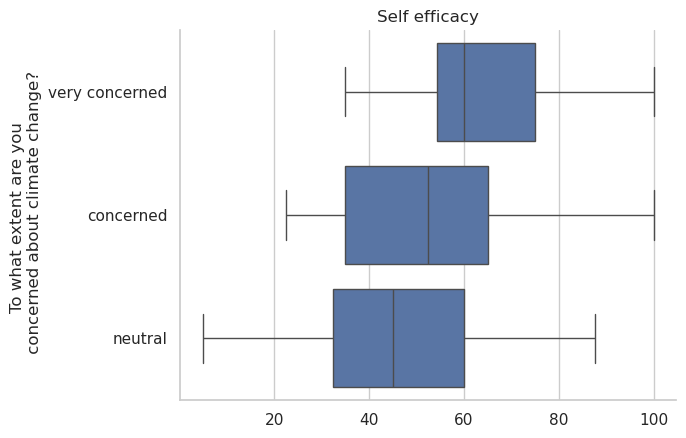

In [89]:
fig=sns.boxplot(df[df['b003']=='yes'],x='self_efficasy',y='b002',order=concern_scale[4:1:-1])
fig.set(title='Self efficacy',xlabel=None,ylabel='To what extent are you \n concerned about climate change?')
plt.show()

### Factors affecting teachers' perception

After analyzing the responses, there appears to be no association of teachers' key perceptions with any demographics (independent variables)

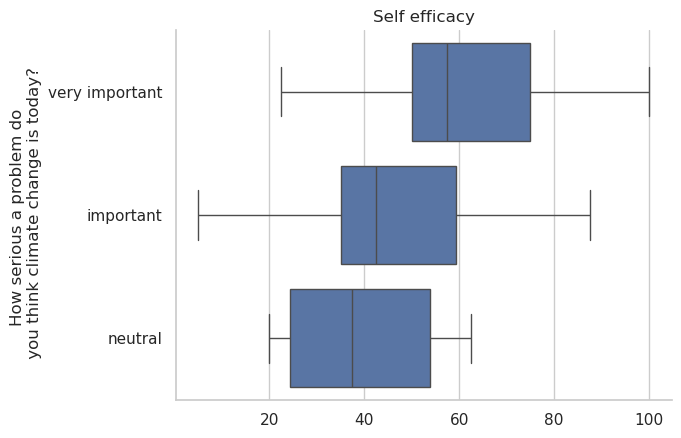

In [91]:
fig=sns.boxplot(df[df['b003']=='yes'],x='self_efficasy',y='b005',order=importance_scale[4:1:-1])
fig.set(title='Self efficacy',xlabel=None,ylabel='How serious a problem do \n you think climate change is today?')
plt.show()

## Discussion

### Perceptions and attitudes about the greenhouse effect and climate change
The results of the survey showed that teachers consider climate change to be an important problem of the planet. However, they believe that there are more important problems at the country level.
The prevailing opinion is that the climate crisis is a serious enough problem of the time with gaseous pollutants as the main cause
The main impact of climate change is considered to be global warming and consequently the rise of water levels.
As a way of coping, the use of renewable energy sources and thus the reduction of exhaust gases is proposed.
The vast majority believe in the existence of climate change and that it is basically due to human activity.

## Climate change education

The teachers' view is that the school does not sufficiently integrate climate change into the curriculum and that students should be taught more about climate change.
In particular, students should possess the necessary knowledge and understanding of climate change, become motivated to respond positively to the challenges of climate change, and enhance the ability to communicate satisfactorily with others about the challenges of climate change.
However, very few teachers have received the necessary training to be able to teach climate change effectively.
The view on whether there are challenges in teaching climate change is not clear. Of the teachers who believe that there are challenges, they consider the lack of teaching time and the difficulty of students to understand the concept of climate change to be more important.

## Teacher self-efficacy

The self-efficacy of the teachers surveyed appears to be above average (67.7 out of 100) with this score rising to (81.15 out of 100) among those who have received training in teaching climate change.
Conclusions
The research showed that there is a significant and positive correlation between basic perceptions and teachers' self-efficacy for teaching climate change. This means that those who are more aware of climate crisis issues are also those who have higher self-efficacy.
However, the above perceptions do not seem to be affected by demographic factors such as age, years of service, general education and training in environmental issues.